# US Visa Prediction Project

### Life cycle of Machine learning Project

    Understanding the Problem Statement
    Data Collection
    Exploratory data analysis
    Data Cleaning
    Data Pre-Processing
    Model Training
    Choose best model

About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).
## 1)  Problem statement.

    OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
    As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

In this project we are going to use the data given to build a Classification model:

    This model is to check if Visa get approved or not based on the given dataset.
    This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.




## 2) Data Collection.

    The Dataset is part of Office of Foreign Labor Certification (OFLC)
    The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset


### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

Import the CSV data as Pandas DataFrame

In [5]:
df = pd.read_csv('EasyVisa.csv')

Show Top 5 Records

In [6]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Shape of the dataset

In [7]:
df.shape

(25480, 12)

Summary of the dataset

In [8]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Check Datatypes in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Check for the null values

In [10]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Exploring Data

In [12]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print(f'We have {len(numerical_features)} numerical feature: {numerical_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 3 numerical feature: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [15]:
# Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-'*50)

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name

Insights:
* case_id have unique values for each column which can be dropped as it is of no importance
* continent column is highly biased towards Asia. 
* unit_of_wage seems to be an important column as most of them are yearly contracts

### Univariate Analysis

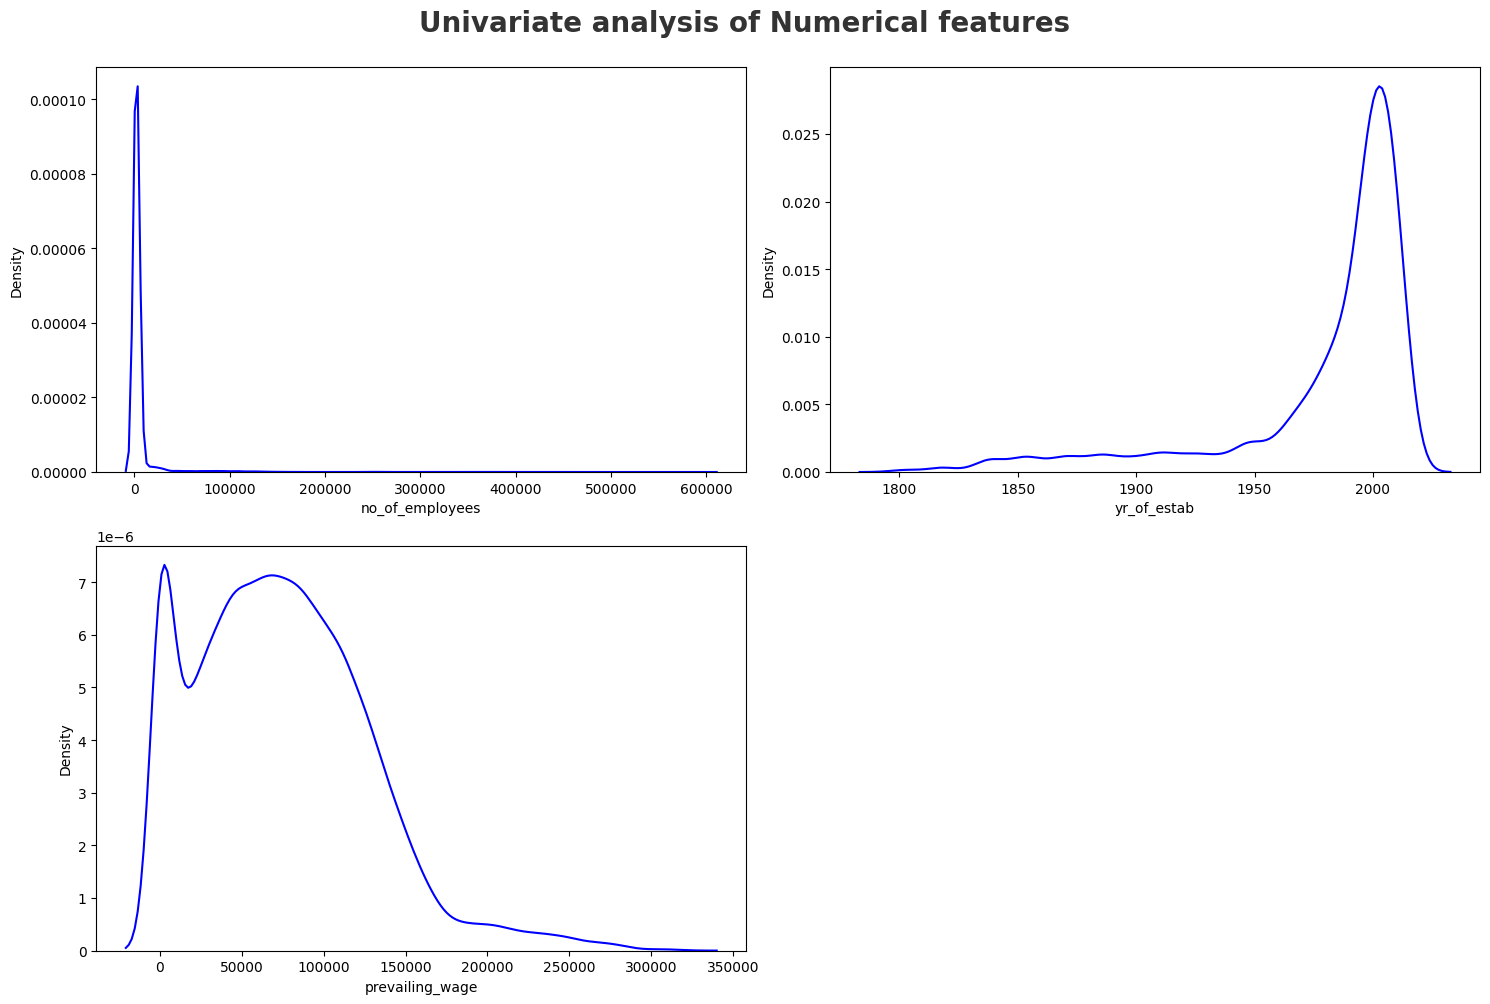

In [17]:
# Numerical features
plt.figure(figsize=(15,10))
plt.suptitle('Univariate analysis of Numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numerical_features)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    

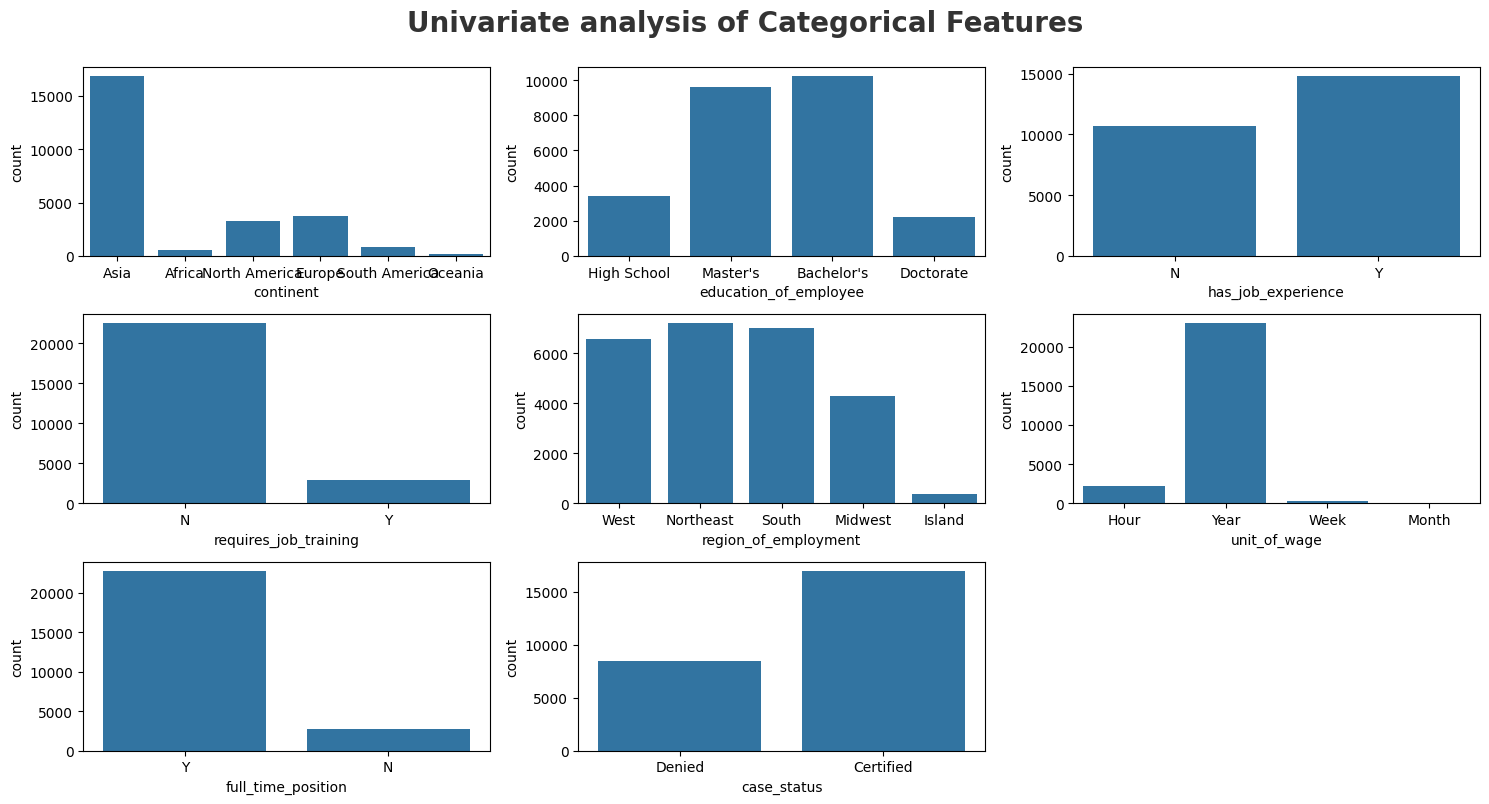

In [22]:
# Categorical Features
#categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    #plt.xlabel(categorical_features)
    plt.tight_layout()





*    requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.
 *   In rest of the columns are balanced.


### Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.




Check Multicollinearity for Categorical features

    A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

    A chi-square statistic is one way to show a relationship between two categorical variables.

    Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [26]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ('Feature name', 'Hypothesis Result')
result

,Feature name,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis




Report

    Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.



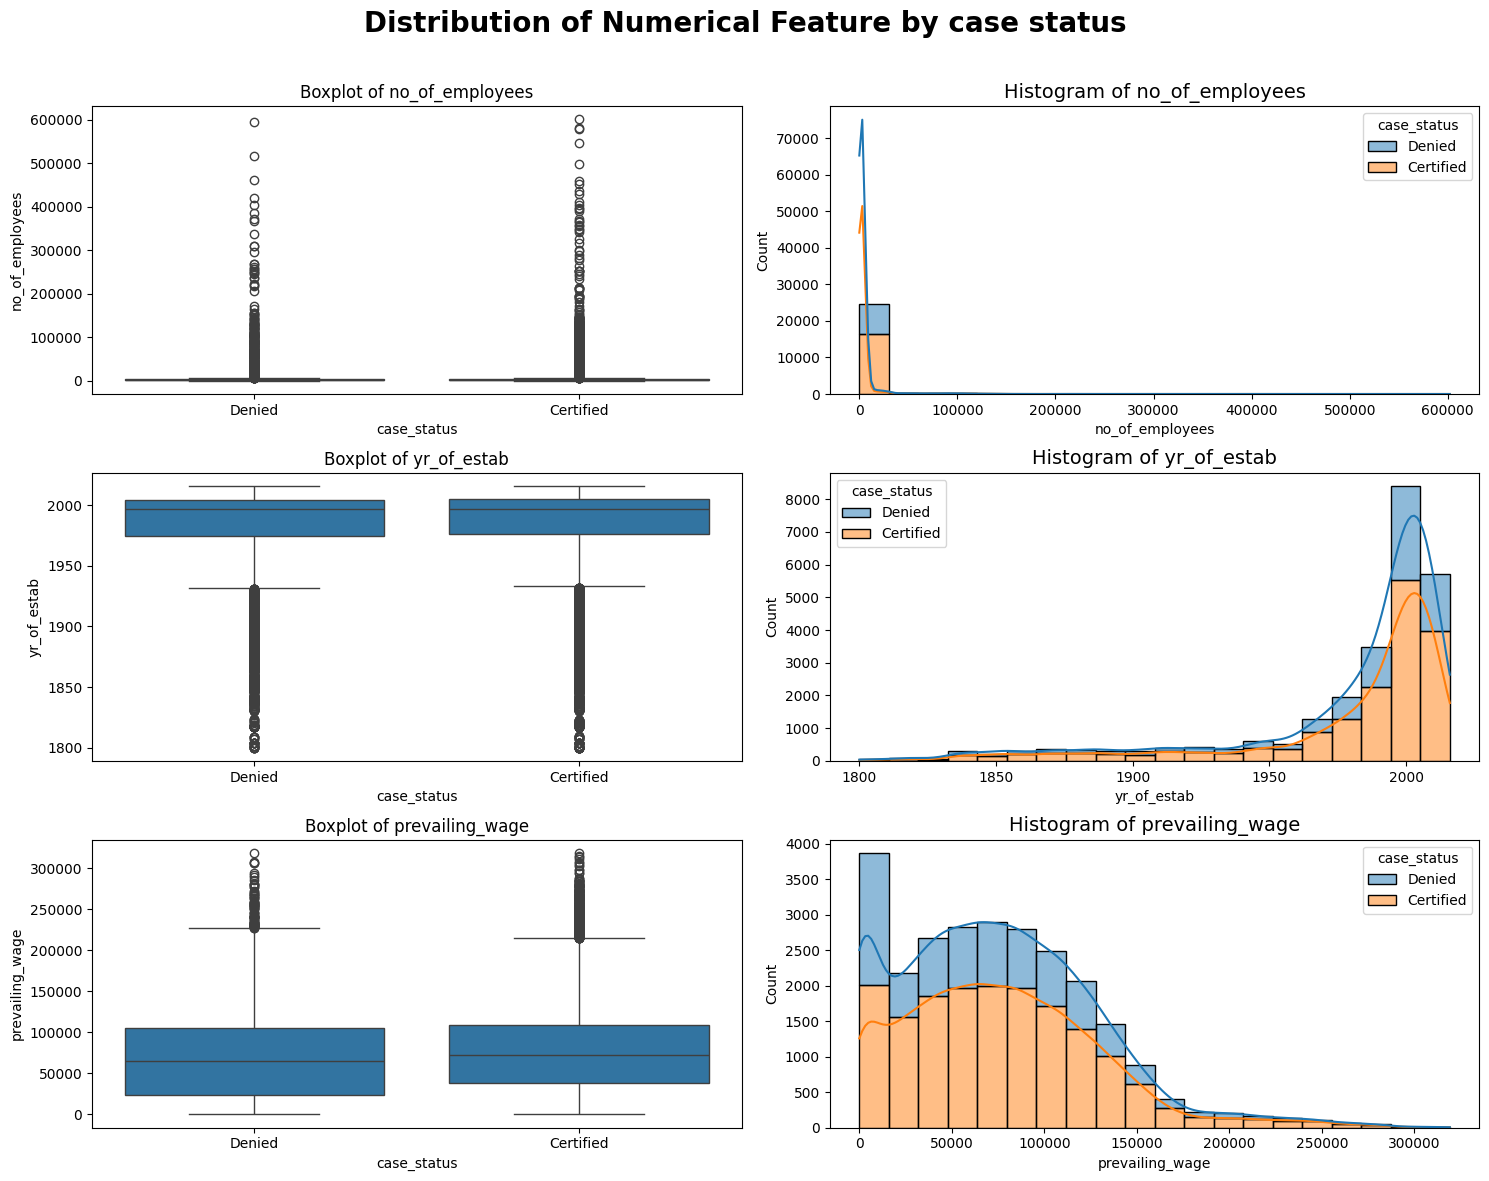

In [29]:
fig, ax = plt.subplots(3,2,figsize=(15,12))
fig.suptitle('Distribution of Numerical Feature by case status', fontsize = 20, fontweight='bold', ha='center')

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='case_status', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack',  ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)



Initial Analysis Report

    No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
    yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
    prevailing_wage is right skewed with outliers above upper bound of box plot.
    There are No missing values in the dataset.
    The case_id column can be deleted because each row has unique values.
    The case_status column is the target to predict.
    In the Categorical column, features can be made Binary numerical in feature Encoding



## 4. Visualization
### 4.1 Visualize the target feature

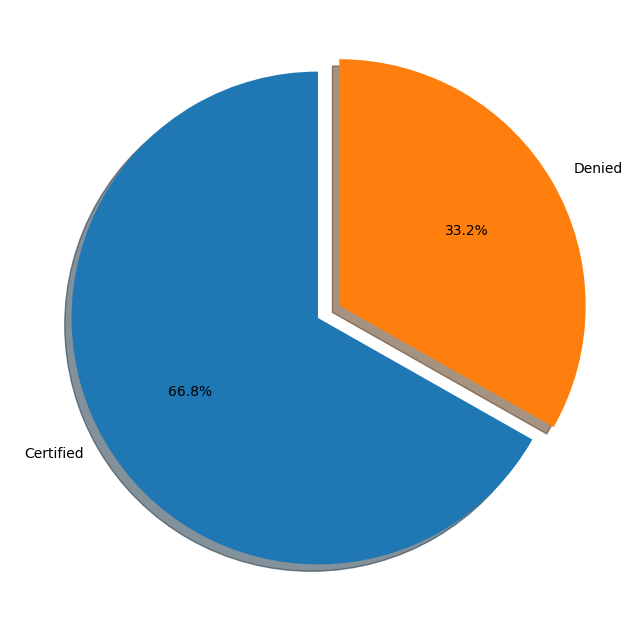

In [32]:
percentage = df['case_status'].value_counts(normalize=True)*100
labels = ["Certified", 'Denied']

fig, ax = plt.subplots(figsize=(15,8))
explode = (0,0.1)
ax.pie(percentage, labels=labels, startangle=90, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

From the chart it is seen that the Target Variable is Imbalanced 


4.2 Does applicant Continent has any impact on Visa status ?


In [35]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

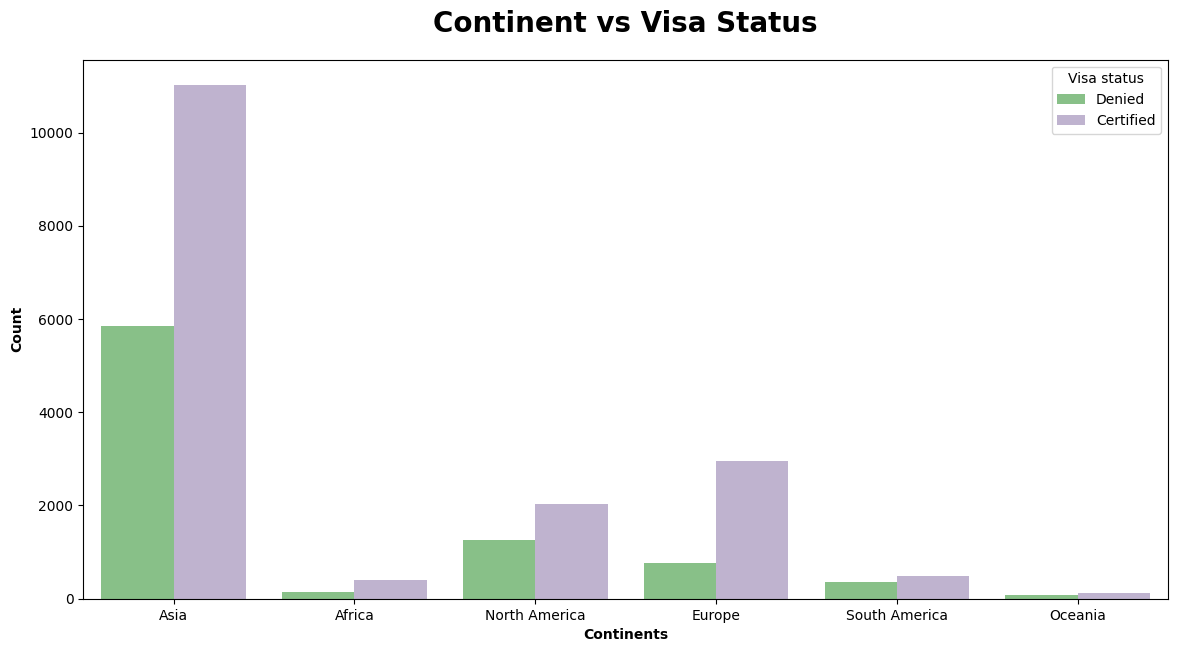

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x='continent', hue='case_status', data=df, palette='Accent')
plt.title('Continent vs Visa Status', weight='bold', fontsize=20, pad=20)
plt.ylabel('Count', weight='bold')
plt.xlabel('Continents',weight='bold')
plt.legend(title='Visa status')
plt.show()

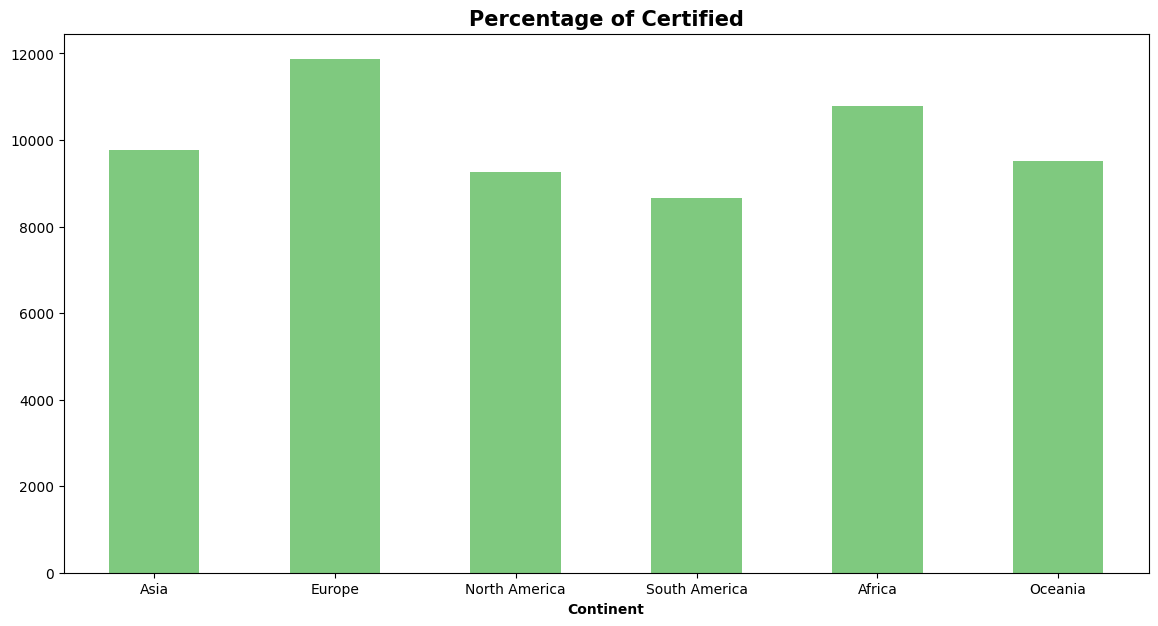

In [51]:
plt.figure(figsize=(14,7))
(df[df['case_status'] == 'Certified']['continent'].value_counts(normalize=True)*100/df['continent'].value_counts(normalize=True)*100).plot(kind='bar', colormap='Accent')
plt.title('Percentage of Certified', fontsize=15, fontweight='bold')
plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

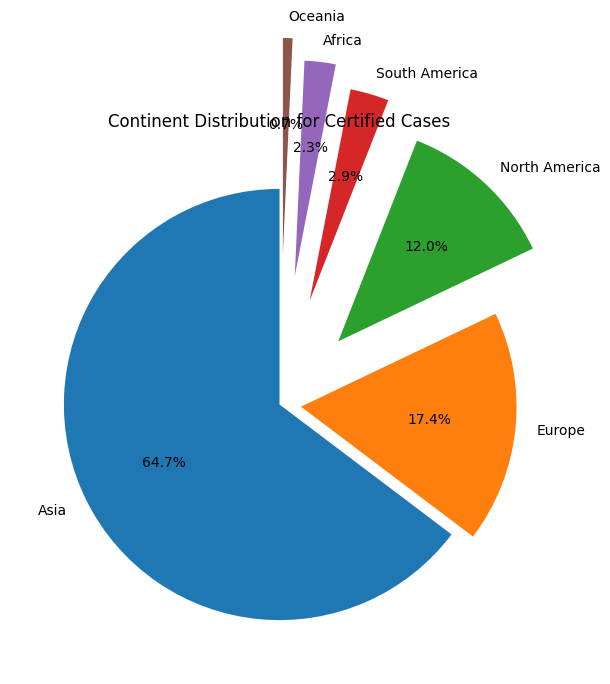

In [61]:
plt.figure(figsize=(7, 7))

df[df['case_status'] == 'Certified']['continent'] \
    .value_counts(normalize=True) \
    .plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        explode=[0,0.1,0.4,0.5,0.6,0.7]
    )

plt.title('Continent Distribution for Certified Cases')
plt.ylabel('')
plt.show()

In [62]:
# Total cases per continent
total_cases = df['continent'].value_counts()

# Certified cases per continent
certified_cases = df[df['case_status'] == 'Certified']['continent'].value_counts()

# Certification percentage
certification_percentage = (certified_cases / total_cases) * 100

# Result
certification_percentage.sort_values(ascending=False)


continent
Europe           79.233655
Africa           72.050817
Asia             65.310480
Oceania          63.541667
North America    61.877278
South America    57.863850
Name: count, dtype: float64

Key Insights (Important)

* Europe has the highest success rate

Strong approval likelihood

Possible reasons:

High-skilled applicants
Stable job roles
Employer credibility

* South America has the lowest certification rate
Almost 21% lower than Europe
Could indicate:
Higher denial risk
Job type / wage differences

Documentation or compliance factors
* Asia ≠ Highest approval (common misconception)
Asia likely has high volume
But approval rate is mid-range (65%)
Important distinction:
High volume ≠ high success rate

### 4.3 Does applicant education has any impact on Visa status ?


In [64]:
edu_cert_rate = (
    df.assign(is_certified = df['case_status']=='Certified')
    .groupby('education_of_employee')['is_certified']
    .mean()*100
)

In [65]:
edu_cert_rate

education_of_employee
Bachelor's     62.214188
Doctorate      87.226277
High School    34.035088
Master's       78.627777
Name: is_certified, dtype: float64

<Axes: ylabel='education_of_employee'>

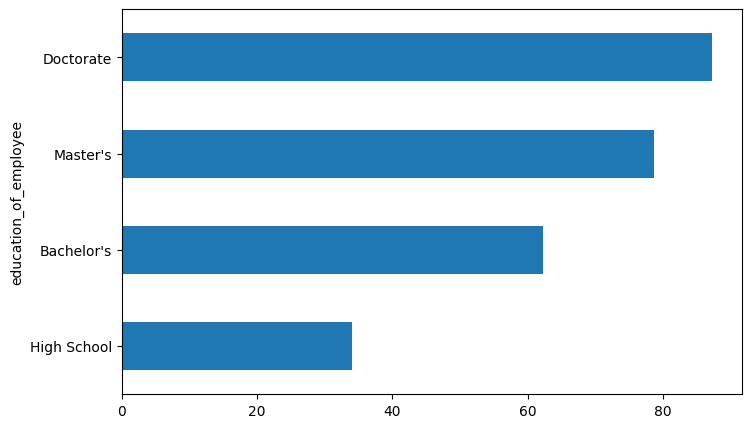

In [66]:
edu_cert_rate.sort_values().plot(
    kind='barh',
    figsize=(8,5)
)

* Applicant education has a significant impact on visa status. Certification rates increase consistently with higher education levels, indicating that advanced qualifications substantially improve the likelihood of visa approval. This aligns with policy emphasis on specialized and high-skill labor.

In [69]:
exp_cert_rate = (
    df.assign(is_certified=df['case_status']=='Certified')
    .groupby('has_job_experience')['is_certified']
    .mean()*100
)
exp_cert_rate

has_job_experience
N    56.134108
Y    74.476422
Name: is_certified, dtype: float64

Applicants with experience consistently show higher certification rates.

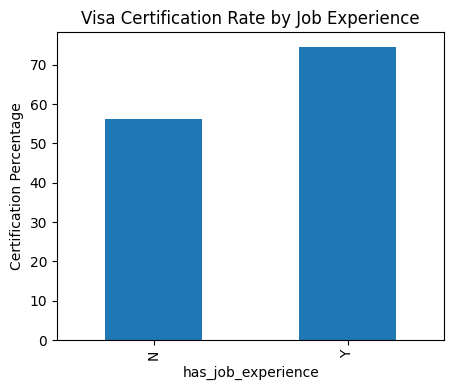

In [74]:
exp_cert_rate.plot(
    kind='bar',
    figsize=(5,4)
)

plt.ylabel('Certification Percentage')
plt.title('Visa Certification Rate by Job Experience')
plt.show()


Applicants with prior work experience have a higher probability of visa certification compared to those without experience. This suggests that work experience plays an important role in visa approval decisions by signaling job readiness and reduced labor market risk.

In [76]:
edu_exp_cert_rate = (
    df.assign(is_certified=df['case_status']=='Certified')
    .groupby(['education_of_employee', 'has_job_experience'])['is_certified']
    .mean()*100
)
edu_exp_cert_rate

education_of_employee  has_job_experience
Bachelor's             N                     51.310948
                       Y                     70.268434
Doctorate              N                     80.127524
                       Y                     92.565947
High School            N                     31.661891
                       Y                     35.671937
Master's               N                     64.287503
                       Y                     88.778585
Name: is_certified, dtype: float64

In [80]:
contingency = pd.crosstab(df['has_job_experience'], df['case_status'])

odds_ratio = (
    (contingency.loc['Y', 'Certified'] / contingency.loc['Y', 'Denied']) /
    (contingency.loc['N', 'Certified'] / contingency.loc['N', 'Denied'])
)

odds_ratio


np.float64(2.2802234032161683)

Previous work experience has a significant positive impact on visa certification status. Applicants with experience consistently demonstrate higher approval rates across all education and wage levels. The effect is particularly strong for lower-wage and mid-education applicants, indicating that work experience acts as a critical risk-mitigating factor in visa approval decisions.

In [87]:
unit_case = pd.crosstab(
                df['unit_of_wage'],
                df['case_status'],
                normalize='index'
            )*100

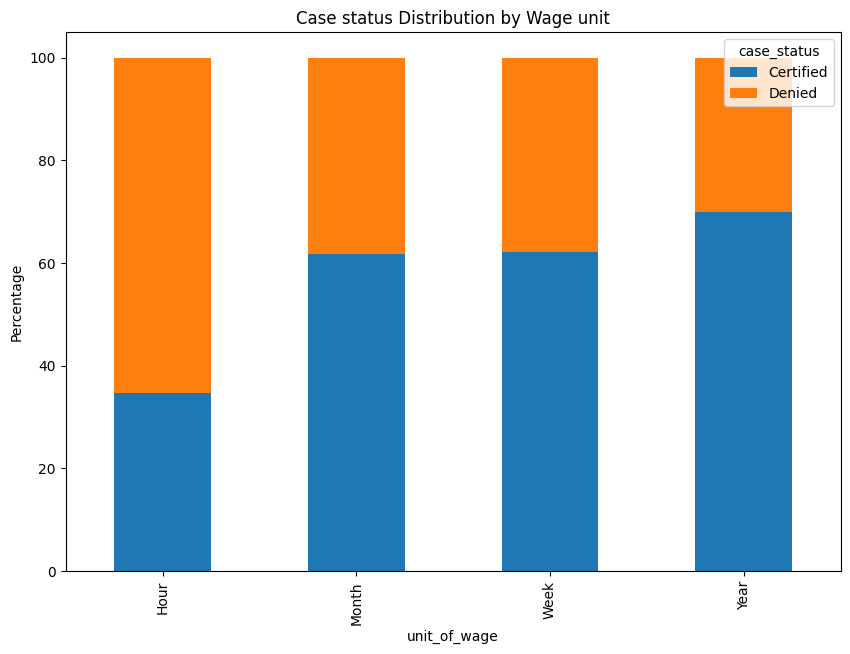

In [94]:
unit_case[['Certified','Denied']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,7)
)
plt.ylabel('Percentage')
plt.title('Case status Distribution by Wage unit')
plt.show()

In [95]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_bin
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,Low
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,High
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,Very High
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,High
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,High
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,Very High
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,Very High
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,High


In [96]:
conversion = {
    'Hour': 40 * 52,
    'Week': 52,
    'Month': 12,
    'Year': 1
}

df['annual_wage'] = df['prevailing_wage'] * df['unit_of_wage'].map(conversion)


In [97]:
df.groupby('case_status')['annual_wage'].describe()


,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,17018.0,162715.283782,543558.191375,100.00,44823.445,79377.20,117915.020,14569149.4
Denied,8462.0,267128.094611,637646.150685,153.11,52178.275,91827.32,143965.765,11957436.4


In [98]:
pd.crosstab(
    df['unit_of_wage'],
    df['case_status'],
    values=df['annual_wage'],
    aggfunc='median'
)


case_status,Certified,Denied
unit_of_wage,,
Hour,783474.224,765009.544
Month,981912.120,947088.420
Week,4435484.560,4266185.560
Year,75427.840,77697.210


Unit of wage shows a meaningful relationship with visa status. Applications with yearly wage units have higher certification rates compared to hourly or weekly wages, indicating that full-time and stable employment contracts are more likely to be approved. Converting wages to annual equivalents further strengthens the relationship between compensation level and visa certification outcomes.

In [99]:
pd.pivot_table(
    df,
    values='case_status',
    index='continent',
    columns='education_of_employee',
    aggfunc=lambda x: (x == 'Certified').mean()
)


education_of_employee,Bachelor's,Doctorate,High School,Master's
continent,,,,
Africa,0.566434,0.796296,0.348485,0.868056
Asia,0.614816,0.845070,0.295197,0.794599
Europe,0.800616,0.931442,0.330612,0.881495
North America,0.523265,0.802326,0.523691,0.695312
Oceania,0.575758,0.863636,0.527778,0.676471
South America,0.480480,0.842697,0.540146,0.627986


In [100]:
df['edu_exp'] = (
    df['education_of_employee'].astype(str) + '_' +
    df['has_job_experience'].astype(str)
)

df.groupby('edu_exp')['case_status'].value_counts(normalize=True)


edu_exp        case_status
Bachelor's_N   Certified      0.513109
               Denied         0.486891
Bachelor's_Y   Certified      0.702684
               Denied         0.297316
Doctorate_N    Certified      0.801275
               Denied         0.198725
Doctorate_Y    Certified      0.925659
               Denied         0.074341
High School_N  Denied         0.683381
               Certified      0.316619
High School_Y  Denied         0.643281
               Certified      0.356719
Master's_N     Certified      0.642875
               Denied         0.357125
Master's_Y     Certified      0.887786
               Denied         0.112214
Name: proportion, dtype: float64

In [101]:
pd.pivot_table(
    df,
    values='case_status',
    index='continent',
    columns='wage_bin',
    aggfunc=lambda x: (x == 'Certified').mean()
)


wage_bin,Low,Mid,High,Very High
continent,,,,
Africa,0.611570,0.736434,0.756250,0.758865
Asia,0.554354,0.675649,0.674519,0.688837
Europe,0.789515,0.810565,0.819652,0.722826
North America,0.528827,0.676278,0.647368,0.651376
Oceania,0.588235,0.666667,0.711111,0.583333
South America,0.496753,0.643192,0.612903,0.613793
